In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interactive_output,Dropdown, FloatSlider
from traitlets import directional_link
from IPython.display import display
import plotly.express as px
from plotly.offline import init_notebook_mode,iplot
import plotly.graph_objects as go
import cufflinks as cf

from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler,RobustScaler,QuantileTransformer,PowerTransformer,Normalizer
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from mlxtend import plotting
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from mlxtend.plotting import plot_decision_regions

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import LeaveOneOut
from yellowbrick.model_selection import CVScores
from sklearn.model_selection import KFold, StratifiedKFold

from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

from sklearn.pipeline import Pipeline
from sklearn.utils import class_weight

init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings('ignore')

sns.set()

## Table of contents

**[1. Explaratory data analysis](#heading--1)**

  * [1.1. Null values](#heading--1-1)
  * [1.2. Duplicates](#heading--1-2)
  * [1.3. Variables distribution](#heading--1-3)
  * [1.4. Outliers](#heading--1-4)
  * [1.5. Correlations/Relationships](#heading--1-5)
  * [1.6. Balance of data](#heading--1-6)
  * [1.7. Skewness of data](#heading--1-7)

**[2. Normalization](#heading--2)**

  * [2.1. Basic text formatting](#heading--2-1)

      * [2.1.1. Not so basic text formatting](#heading--2-1-1)

  * [2.2. Lists, Images, Code](#heading--2-2)
  * [2.3. Special features](#heading--2-3)

**[3. Testing models](#heading--3)**
  
---

<div id='heading--1'/>
<h1> 1. Exploratory data analysis 

In [8]:
df= pd.read_csv('winequality-red.csv',sep=';')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


<div id='heading--1-1'/>
<h3>1.1. Null values

In [10]:
# Searching for null values
null = round(df.isna().sum()/len(df)*100,2)
null[null > 0].sort_values() 


Series([], dtype: float64)

<a name="heading--1-2"/></a>
<h2>1.2. Duplicates 

In [11]:
# Searching for duplicates
df.duplicated().sum()

240

In [12]:
df[df.duplicated()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [13]:
df.drop_duplicates(inplace=True)

<div id='heading--1-3'/>
<h2> 1.3. Variables distribution 

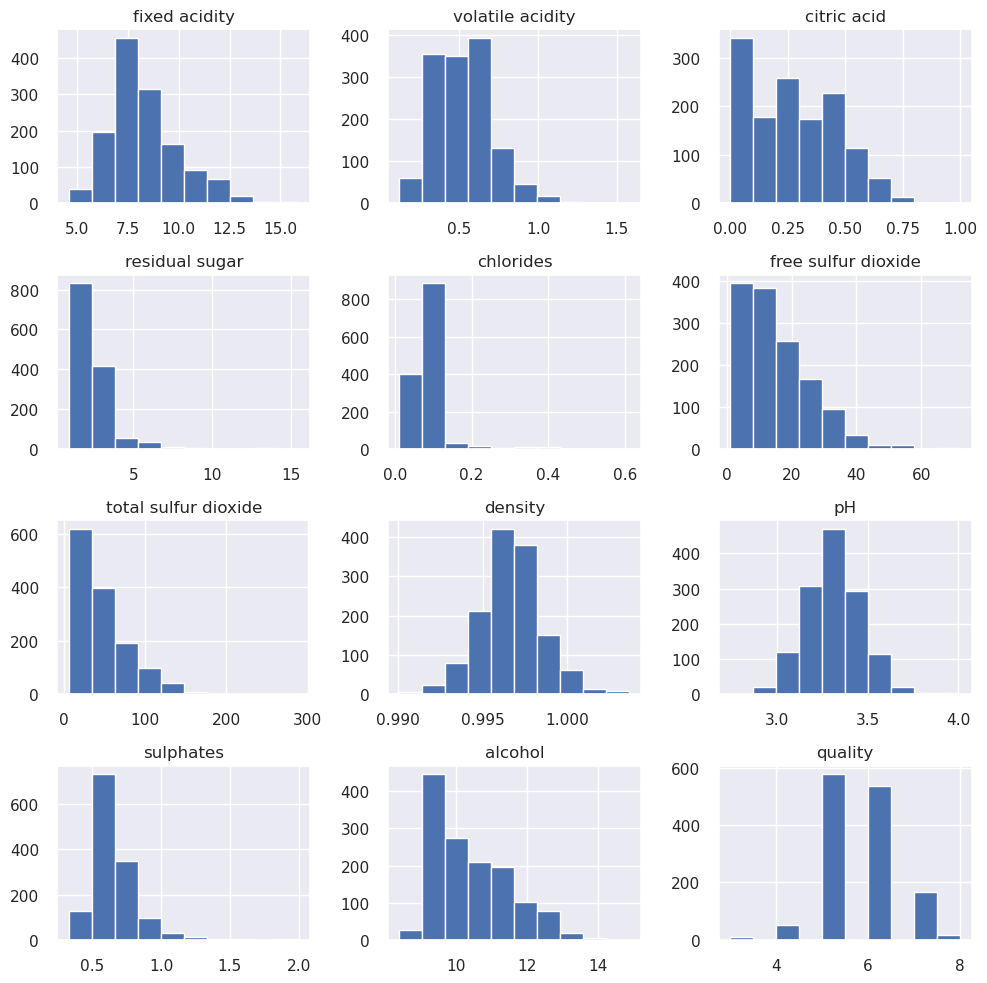

In [14]:
df.hist(figsize=(10,10)) 
plt.tight_layout()
plt.show()

In [15]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<div id='heading--1-4'/>
<h2> 1.4. Outliers 

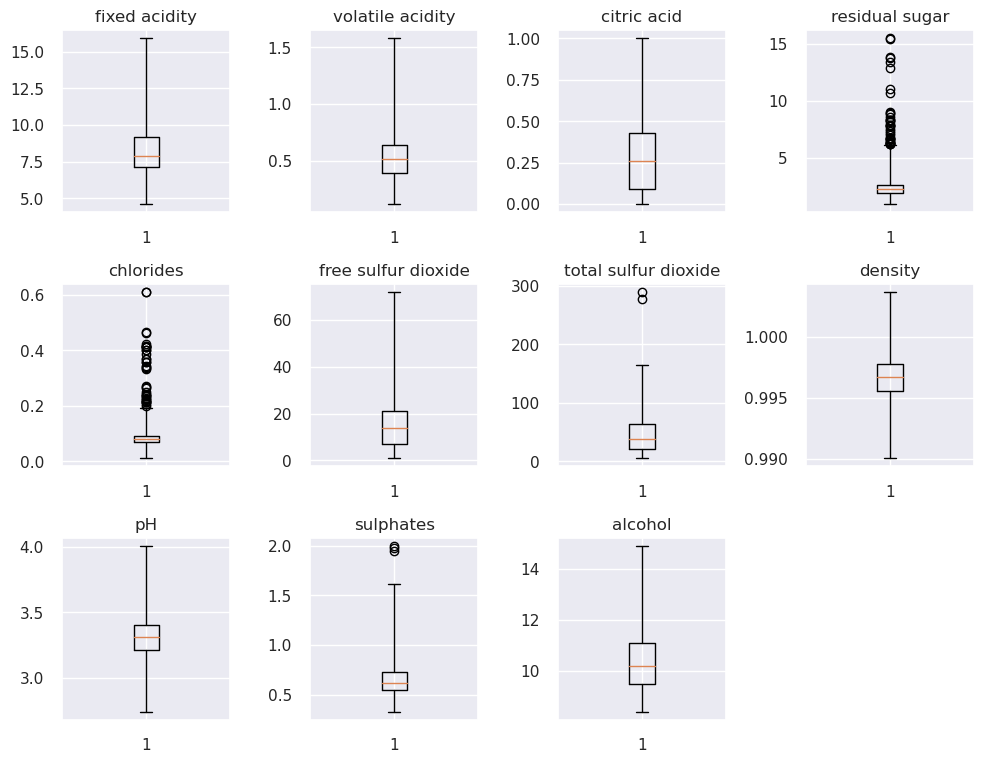

In [16]:
# Searching for outliers
continuous_features = df.iloc[:,:11]
continuous_labels = list(continuous_features.columns)
i = 1
plt.figure(figsize=(10,10))
for var in continuous_labels:
   plt.subplot(4,4,i)
   plt.boxplot(continuous_features[var],whis=5)
   plt.title(var)
   i+=1
plt.tight_layout()
plt.show()

<div id='heading--1-5'/>
<h2> 1.5. Correlations/Relationships

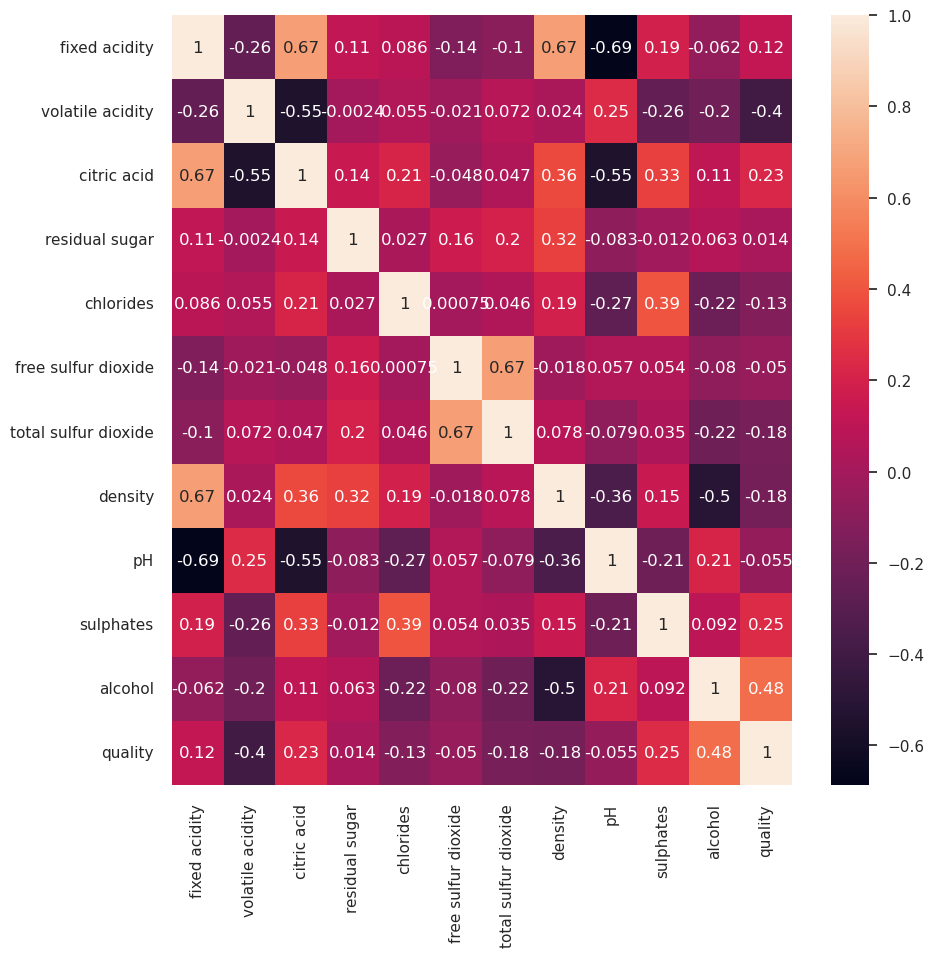

In [17]:
# Correlation between features
corr_matrix = df.corr()
plt.figure(figsize = (10,10))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [18]:
# Detailed analysis of correlations between data
numerical_columns = [column for column in df.columns if df[column].dtype == "float"]
numerical_columns

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [19]:
def num_data_analysis(df):
    
    
    n1 = widgets.Dropdown(options=numerical_columns,
                    value = numerical_columns[0],
                    description="Column 1: ")

    n2 = widgets.Dropdown(options=numerical_columns,
                        value = numerical_columns[1],
                        description="Column 2: ")

    d3_options = sorted([str(x) for x in df['quality'].unique()])
    d3_options.append('all')

    d3 = widgets.Dropdown(options=d3_options,
                        value="all",
                        description="Wine quality: ")

    numeric_box = widgets.HBox([n1,n2,d3])
   
    parameters = [n1.value,n2.value]
    
    
    def data_filter(column1,column2,dropdown3):
        
        global parameters
        parameters = [column1,column2]
        
        if dropdown3 == 'all':
            filtered_data = df
        else:
            filtered_data = df[df['quality']==int(dropdown3)]

        return filtered_data
    
    def draw_plot2(column1,column2,dropdown3):
        
        filtered_data = data_filter(column1,column2,dropdown3)
        
        print(f"""
        {column1} min value: {filtered_data[column1].min():.2f}
        {column1} max value: {filtered_data[column1].max():.2f}
        {column2} min value: {filtered_data[column2].min():.2f}
        {column2} max value: {filtered_data[column2].max():.2f}""")

        if dropdown3 == 'all':

            fig, axes = plt.subplots(1, 2,figsize=(10, 5))
            fig.suptitle(f'Data distribution for wines of different quality')
            sns.boxplot(data=filtered_data, x='quality', y=column1,showmeans=True,meanprops={"markeredgecolor": "yellow"},ax=axes[0])
            sns.boxplot(data=filtered_data, x='quality', y=column2,showmeans=True,meanprops={"markeredgecolor": "yellow"},ax=axes[1])
            plt.show()

        else:
            fig, axes = plt.subplots(1, 2, figsize=(10, 5))
            fig.suptitle(f'Data distribution for {dropdown3} quality wines')
            sns.boxplot(data=filtered_data, x='quality', y=column1,showmeans=True,meanprops={"markeredgecolor": "yellow"},ax=axes[0])
            sns.boxplot(data=filtered_data, x='quality', y=column2,showmeans=True,meanprops={"markeredgecolor": "yellow"},ax=axes[1])
            plt.show()


    def draw_plot1(column1,column2,dropdown3):
        
        filtered_data = data_filter(column1,column2,dropdown3)
        
        print(f"""
        correlation coefficient: {filtered_data[column1].corr(filtered_data[column2]):.3f}
        number of samples: {filtered_data[column1].count()}
        {column1} mean value: {filtered_data[column1].mean():.2f}
        {column2} mean value: {filtered_data[column2].mean():.2f}""")

        if dropdown3 == 'all':
            p = sns.jointplot(data=filtered_data,x=column1,y=column2,hue='quality')
            p.fig.suptitle(f"Relationship between the '{column1}' and '{column2}'\n variables for wines of different quality")
            p.fig.tight_layout()
            p.fig.subplots_adjust(top=0.90)
            plt.show()
            
        else:
            p = sns.jointplot(data=filtered_data,x=column1,y=column2)
            p.fig.suptitle(f"Relationship between the '{column1}' and '{column2}'\n variables for wines of different quality")
            p.fig.tight_layout()
            p.fig.subplots_adjust(top=0.90)
            plt.show()

    out = widgets.interactive_output(draw_plot1,{'column1':n1, 'column2': n2, 'dropdown3':d3})
    out2 = widgets.interactive_output(draw_plot2,{'column1':n1, 'column2': n2, 'dropdown3':d3})

    num_box_out = widgets.HBox([out,out2])
    display(numeric_box, num_box_out)



In [20]:
num_data_analysis(df)

In [21]:
px.scatter(df, x=parameters[0], y=parameters[1], color='quality', marginal_x="box", marginal_y="box",width=700,height=700,opacity=0.5)

<div id='heading--1-6'/>
<h2> 1.6. Balance of data

In [22]:
#labels
lab = df["quality"].value_counts().keys().tolist()
#values
val = df["quality"].value_counts().values.tolist()
trace = go.Pie(labels=lab, 
                values=val, 
                marker=dict(colors=['red']), 
                # Seting values to 
                hoverinfo="value"
              )

data = [trace]
layout = go.Layout(title="Wine quality")
fig = go.Figure(data = data, layout = layout)
iplot(fig)

<div id='heading--1-7'/>
<h2> 1.7. Skewness of data

### The Shapiro-Wilks test
 The null hypothesis for this test is that the data is a sample from a normal distribution, so a p-value less than 0.05 indicates significant skewness.

In [23]:
# Method 1
from scipy.stats import shapiro
response = df['chlorides']
p_value = shapiro(response)[1]
p_value

0.0

In [24]:
# Method 2
skew_feast = df[numerical_columns].skew().sort_values(ascending=False)
skewness = pd.DataFrame({"Skew":skew_feast})
skewness

,Skew
chlorides,5.502487
residual sugar,4.548153
sulphates,2.406505
total sulfur dioxide,1.540368
free sulfur dioxide,1.226579
fixed acidity,0.941041
alcohol,0.859841
volatile acidity,0.729279
citric acid,0.312726
pH,0.232032


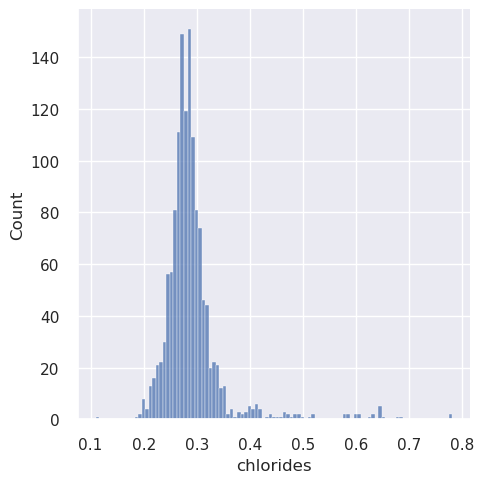

In [25]:
# Square Root Transformation
sqrt_chlorides = df["chlorides"]**(0.5)
sns.displot(sqrt_chlorides)

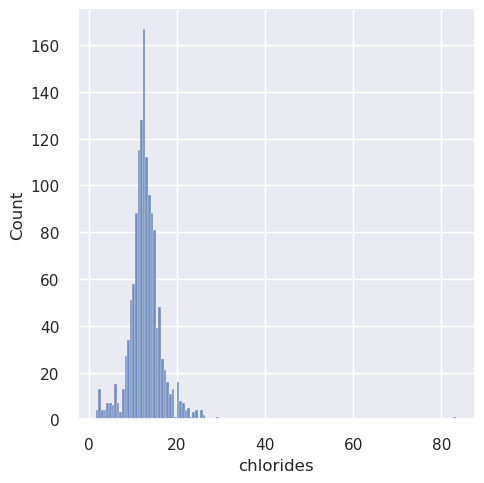

In [26]:
# Reciprocal Transformation
recip_chlorides = 1/df["chlorides"]
sns.displot(recip_chlorides)

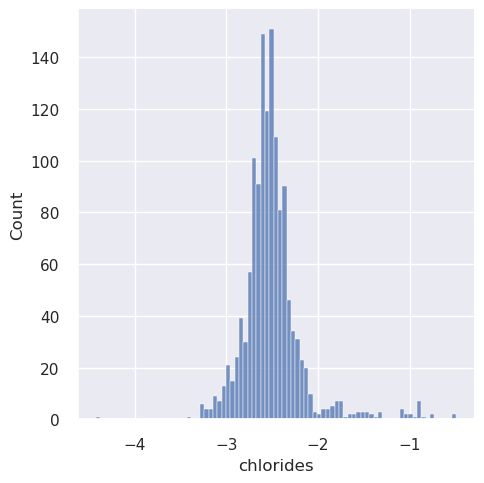

In [27]:
# Log Transformation
log_chlorides = np.log(df["chlorides"])
sns.displot(log_chlorides)

<div id='heading--2'/>
<h1> 2. Normalization/standarization

In [28]:
scaling_models = {
'standard_scaler' : StandardScaler(),
'min_max_scaler' : MinMaxScaler(),
'max_abs_scaler' : MaxAbsScaler(),
'robust_scaler' : RobustScaler(),
'quantile_transformer_normal' : QuantileTransformer(output_distribution='normal'),
'quantile_transformer_uniform' : QuantileTransformer(output_distribution='uniform'),
'power_transformer_YeoJohnson' : PowerTransformer(method='yeo-johnson'),
'normalizer' : Normalizer()}

In [29]:
def scale_dataset (df:pd.DataFrame,scalers:list): 
    
    normalized_datasets = {}
    normalized_datasets['unscaled'] = df
    for scaler in scalers:
        values = df.values
        names = df.columns
        dataframe_name = str('df_' + scaler)
        model = scaling_models[scaler]
        values_scaled = model.fit_transform(values)
        scaled_df = pd.DataFrame(values_scaled)
        scaled_df.columns = names
        normalized_datasets[dataframe_name] = pd.DataFrame(scaled_df)

    return normalized_datasets


In [30]:
scaled_datasets = scale_dataset(df.drop(['quality'], axis=1),list(scaling_models.keys()))

In [31]:
for x in scaled_datasets.keys():
    print(x)

unscaled
df_standard_scaler
df_min_max_scaler
df_max_abs_scaler
df_robust_scaler
df_quantile_transformer_normal
df_quantile_transformer_uniform
df_power_transformer_YeoJohnson
df_normalizer


In [32]:
def plot_scaled_dataframe(scaled_datasets):
    
    n= widgets.Dropdown(options=scaled_datasets.keys(),
                        value = 'unscaled',
                        description="Select dataframe: ")

    def draw_plot(dataframe):
        
        scaled_datasets[dataframe].hist(figsize=(10,10)) 
        plt.tight_layout()
        plt.show()

    out = widgets.interactive_output(draw_plot,{'dataframe':n})

    display(n,out)



In [33]:
plot_scaled_dataframe(scaled_datasets)

Dropdown(description='Select dataframe: ', options=('unscaled', 'df_standard_scaler', 'df_min_max_scaler', 'df…

Output()

# Model test

In [34]:
# Changing target classes
df_2 = df.copy()
df_2['quality']= [0 if x <= 4 else 1 if x <= 5 else 2 if x <=6 else 3 for x in df_2['quality']]
# df_2['quality']= [0 if x <= 4 else 1 if x <=6 else 2 for x in df_2['quality']]

In [35]:
def scale_and_split_dataset(df:pd.DataFrame,scalers:list,X:list,y:list): 
    
    scaled_datasets = {}
    names = df.columns
    X_values = df[X].values # returns a numpy array
    y_values = df[y].values # returns a numpy array
    X_train, X_test, y_train, y_test = train_test_split(X_values, y_values, test_size=0.2, stratify=y_values, random_state=42)
    scaled_datasets['unscaled'] = {'X_train':X_train,
                                    'X_test':X_test,
                                    'y_train':y_train,
                                    'y_test':y_test,
                                    'feature_names':names}

    for scaler in scalers:

        model = scaling_models[scaler]
        X_train_scaled = model.fit_transform(X_train)
        X_test_scaled = model.transform(X_test)
        dataset_name = str('df_' + scaler)
        
        scaled_datasets[dataset_name] = {'X_train':X_train_scaled,
                                            'X_test':X_test_scaled,
                                            'y_train':y_train,
                                            'y_test':y_test,
                                            'feature_names':names}

    return scaled_datasets


In [36]:
scaled_datasets = scale_and_split_dataset(df_2,list(scaling_models.keys()),numerical_columns,['quality'])

## CROSS-VALIDATION

In [37]:
X = numerical_columns
y = 'quality'

X_values = df_2[X].values # returns a numpy array
y_values = df_2[y].values # returns a numpy array
X_train, X_test, y_train, y_test = train_test_split(X_values, y_values, test_size=0.2, stratify=y_values, random_state=42)


folds = StratifiedKFold(10,shuffle=True,random_state=0)
classes_weights = class_weight.compute_sample_weight(class_weight='balanced',y=y_train)

models={
    
    'LogistricRegression': LogisticRegression(random_state=42, class_weight='balanced',max_iter=10000),
    'RandomForestClassifier': RandomForestClassifier(random_state=42, class_weight='balanced'),
    'SVMClassifier': OneVsRestClassifier(SVC(random_state=42, class_weight='balanced')),
    'XGBoostClassifier': XGBClassifier(random_state=42,weights=classes_weights,eval_metric='error', objective='multi:softprob', num_class=3)
    }

def cv_comparison(models,scalers,X,y,cv):

    # Initiate a DataFrame for the averages and a list for all measures

    cv_metrics = pd.DataFrame()
    accuracy_scores = []
    f1_scores = []
    precision_scores = []
    recall_scores = []
    roc_auc_scores = []

    # Loop through the models and scalers, run a CV, add the average scores to the DataFrame and the scores of 
    # all CVs to the list
    
    for model_name, model in models.items():
        for scaler_name, scaler in scalers.items():
            
            pipe = Pipeline([('scaler', scaler), ('model', model)])

            accuracy = np.round(cross_val_score(pipe, X, y, scoring='accuracy', cv=cv), 4)
            accuracy_scores.append(accuracy)
            accuracy_avg = round(accuracy.mean(),4)
           

            f1 = np.round(cross_val_score(pipe, X, y, scoring='f1_macro', cv=cv), 4)
            f1_scores.append(f1)
            f1_avg = round(f1.mean(),4)
            

            precision = np.round(cross_val_score(pipe, X, y, scoring='precision_macro', cv=cv), 4)
            precision_scores.append(precision)
            precision_avg = round(precision.mean(),4)

            recall = np.round(cross_val_score(pipe, X, y, scoring='recall_macro', cv=cv), 4)
            recall_scores.append(recall)
            recall_avg = round(recall.mean(),4)

            roc_auc = np.round(cross_val_score(pipe, X, y, scoring='roc_auc', cv=cv), 4)
            roc_auc_scores.append(roc_auc)
            roc_auc_avg = round(roc_auc.mean(),4)
            
            cv_metrics[str(model_name + '_' +scaler_name)] = [accuracy_avg, f1_avg, precision_avg, recall_avg,roc_auc_avg,model_name,scaler_name]
            
    cv_metrics.index = ['Accuracy', 'F1 score (macro)', 'Precision(macro)', 'Recall(macro)', 'ROC-AUC', 'Model', 'Scaler']
    return cv_metrics, accuracy_scores, f1_scores, recall_scores, precision_scores, roc_auc_scores

    

In [38]:
cv_metrics, accuracy_scores, f1_scores, recall_scores, precision_scores, roc_auc_scores = cv_comparison(models, scaling_models, X_train, y_train, folds)

[01:56:33] WARNING: ../src/learner.cc:767: 
Parameters: { "weights" } are not used.

[01:56:34] WARNING: ../src/learner.cc:767: 
Parameters: { "weights" } are not used.

[01:56:34] WARNING: ../src/learner.cc:767: 
Parameters: { "weights" } are not used.

[01:56:34] WARNING: ../src/learner.cc:767: 
Parameters: { "weights" } are not used.

[01:56:35] WARNING: ../src/learner.cc:767: 
Parameters: { "weights" } are not used.

[01:56:35] WARNING: ../src/learner.cc:767: 
Parameters: { "weights" } are not used.

[01:56:35] WARNING: ../src/learner.cc:767: 
Parameters: { "weights" } are not used.

[01:56:36] WARNING: ../src/learner.cc:767: 
Parameters: { "weights" } are not used.

[01:56:36] WARNING: ../src/learner.cc:767: 
Parameters: { "weights" } are not used.

[01:56:36] WARNING: ../src/learner.cc:767: 
Parameters: { "weights" } are not used.

[01:56:37] WARNING: ../src/learner.cc:767: 
Parameters: { "weights" } are not used.

[01:56:37] WARNING: ../src/learner.cc:767: 
Parameters: { "weight

In [39]:
cv_metrics.T

,Accuracy,F1 score (macro),Precision(macro),Recall(macro),ROC-AUC,Model,Scaler
LogistricRegression_standard_scaler,0.4958,0.4407,0.4548,0.521,NaN,LogistricRegression,standard_scaler
LogistricRegression_min_max_scaler,0.4645,0.4123,0.428,0.5119,NaN,LogistricRegression,min_max_scaler
LogistricRegression_max_abs_scaler,0.4277,0.3838,0.4129,0.5,NaN,LogistricRegression,max_abs_scaler
LogistricRegression_robust_scaler,0.4958,0.4408,0.4542,0.5221,NaN,LogistricRegression,robust_scaler
LogistricRegression_quantile_transformer_normal,0.4572,0.413,0.4284,0.4992,NaN,LogistricRegression,quantile_transformer_normal
LogistricRegression_quantile_transformer_uniform,0.4719,0.4312,0.4452,0.5325,NaN,LogistricRegression,quantile_transformer_uniform
LogistricRegression_power_transformer_YeoJohnson,0.4931,0.4463,0.4554,0.5359,NaN,LogistricRegression,power_transformer_YeoJohnson
LogistricRegression_normalizer,0.4333,0.3596,0.371,0.3973,NaN,LogistricRegression,normalizer
RandomForestClassifier_standard_scaler,0.6164,0.4611,0.5126,0.4504,NaN,RandomForestClassifier,standard_scaler
RandomForestClassifier_min_max_scaler,0.621,0.4646,0.5197,0.4532,NaN,RandomForestClassifier,min_max_scaler


# Hyperparameters tuning

In [73]:
import numpy as np
from sklearn import svm
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline

#model__ necessary for pipeline function

def get_params_SVC(): 

        tuned_parameters = {
        'model__estimator__C':            ([0.1, 0.01, 0.001, 1, 10, 100]),             
        'model__estimator__kernel':       ['linear', 'rbf','poly'],                
        'model__estimator__degree':       ([1,2,3,4,5]),
        'model__estimator__gamma':         [1, 0.1, 0.01, 0.001, 0.0001],
        }

        return(tuned_parameters)

def get_params_lg():

        tuned_parameters = {
        'model__solver':      ['newton-cg', 'lbfgs', 'liblinear'],
        'model__penalty':     ['none','l1', 'l2', 'elasticnet'],
        'model__C':           [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]        
        }

        return(tuned_parameters)   

def get_params_rf():

        tuned_parameters = {

        'model__n_estimators': [10,50,100,200],
        'model__max_depth': [5,10,15,20,25,30,35,40,50,None],
        'model__max_features': ['auto', 'sqrt','log2'],
        'model__criterion': ['gini', 'entrophy'],
        'model__min_samples_split': [2,3,4,5,6,7,8,9,10],
        'model__min_impurity_decrease': [0.0,0.05,0.1],
        'model__bootstrap': [True, False]
        }     
        
        return(tuned_parameters) 


parameters = {

    'LogistricRegression': get_params_lg(),
    'RandomForestClassifier': get_params_rf(),
    'SVMClassifier': get_params_SVC(),
#     'XGBoostClassifier': get_params_xgb()
        
}

def find_best_params(models:list, scalers:list, parameters, X, y, cv):

    # Initiate dictionaries with parameters and scores

    list_params_pipe = {}  
    list_scores_pipe = {}   

    # Loop through the models, run a RandomizedSearchCV, add the best scores and params to dictionary
    
    for model_name, model in models.items():
        for scaler_name, scaler in scalers.items():
            
            pipe = Pipeline([('scaler', scaler), ('model', model)])
            params = parameters[model_name]
            search = RandomizedSearchCV(estimator=pipe, param_distributions= params, scoring = 'f1_weighted', n_jobs = -1,verbose = 1,cv = cv)

            # execute search
            result = search.fit(X_train, y_train)

            list_params_pipe[str(model_name+'_'+scaler_name)]=search.best_params_
            list_params_pipe[str(model_name+'_'+scaler_name)]=search.best_score_

            # summarize result
            print(f'Model: {model_name}, Scaler: {scaler_name}')
            print('Best Score: %s' % result.best_score_)
            print('Best Hyperparameters: %s' % result.best_params_)

    return list_params_pipe,list_scores_pipe


In [74]:
scalers_2 = {
'robust_scaler' : RobustScaler(),
'power_transformer_YeoJohnson' : PowerTransformer(method='yeo-johnson')}

folds_2 = StratifiedKFold(5,shuffle=True,random_state=0)
classes_weights = class_weight.compute_sample_weight(class_weight='balanced',y=y_train)

models_2={
    'LogistricRegression': LogisticRegression(random_state=42, class_weight='balanced',max_iter=10000),
    'RandomForestClassifier': RandomForestClassifier(random_state=42, class_weight='balanced'),
    'SVMClassifier': OneVsRestClassifier(SVC(random_state=42, class_weight='balanced'))

    }

In [79]:
find_best_params(models_2, scalers_2, parameters, X_train, y_train, cv=folds_2)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Model: LogistricRegression, Scaler: robust_scaler
Best Score: 0.5349355765198518
Best Hyperparameters: {'model__solver': 'liblinear', 'model__penalty': 'l1', 'model__C': 1}
Fitting 5 folds for each of 10 candidates, totalling 50 fits


/home/natszynk/anaconda3/envs/geo_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/natszynk/anaconda3/envs/geo_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/natszynk/anaconda3/envs/geo_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/natszynk/anaconda3/envs/geo_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/natszynk/anaconda3/envs/geo_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.w

Model: LogistricRegression, Scaler: power_transformer_YeoJohnson
Best Score: 0.501651445554226
Best Hyperparameters: {'model__solver': 'newton-cg', 'model__penalty': 'none', 'model__C': 0.0001}
Fitting 5 folds for each of 10 candidates, totalling 50 fits


/home/natszynk/anaconda3/envs/geo_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/natszynk/anaconda3/envs/geo_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/natszynk/anaconda3/envs/geo_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=

Model: RandomForestClassifier, Scaler: robust_scaler
Best Score: 0.562323677354718
Best Hyperparameters: {'model__n_estimators': 10, 'model__min_samples_split': 3, 'model__min_impurity_decrease': 0.0, 'model__max_features': 'auto', 'model__max_depth': 30, 'model__criterion': 'gini', 'model__bootstrap': False}
Fitting 5 folds for each of 10 candidates, totalling 50 fits


/home/natszynk/anaconda3/envs/geo_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/natszynk/anaconda3/envs/geo_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/natszynk/anaconda3/envs/geo_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=

Model: RandomForestClassifier, Scaler: power_transformer_YeoJohnson
Best Score: 0.6142315980321028
Best Hyperparameters: {'model__n_estimators': 200, 'model__min_samples_split': 3, 'model__min_impurity_decrease': 0.0, 'model__max_features': 'log2', 'model__max_depth': 50, 'model__criterion': 'gini', 'model__bootstrap': True}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Model: SVMClassifier, Scaler: robust_scaler
Best Score: 0.5736169407262559
Best Hyperparameters: {'model__estimator__kernel': 'rbf', 'model__estimator__gamma': 0.1, 'model__estimator__degree': 4, 'model__estimator__C': 10}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Model: SVMClassifier, Scaler: power_transformer_YeoJohnson
Best Score: 0.5443313998314523
Best Hyperparameters: {'model__estimator__kernel': 'linear', 'model__estimator__gamma': 0.01, 'model__estimator__degree': 1, 'model__estimator__C': 0.01}


In [ ]:
# DO MODYFIKACJI

# Evaluation of selected models

In [52]:
results_forest = {}

for dataset in scaled_datasets.keys():

    X_train = scaled_datasets[dataset]['X_train']
    X_test = scaled_datasets[dataset]['X_test']
    y_train = scaled_datasets[dataset]['y_train']
    y_test  = scaled_datasets[dataset]['y_test']
     
    
    rf_classifier = RandomForestClassifier(n_estimators = 5, class_weight='balanced', random_state=42)
    rf_classifier.fit(X_train, y_train)
    y_pred = rf_classifier.predict(X_test) ####-> predykcja ktora daje y na zbiorze treningowym   
    y_fit_train = rf_classifier.predict(X_train) 
    report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))
    results_forest[dataset] = report

    print(f"NORMALIZATION MODEL:\n{dataset}")
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_pred)}")
    print(f"ACCURACY SCORE TRAINING:\n{accuracy_score(y_train, y_fit_train):.4f}")
    print(f"ACCURACY SCORE TEST:\n{accuracy_score(y_test, y_pred):.4f}\n")

NORMALIZATION MODEL:
unscaled
CONFUSION MATRIX:
[[ 1 10  2  0]
 [ 3 76 34  2]
 [ 2 43 50 12]
 [ 0  3 22 12]]
ACCURACY SCORE TRAINING:
0.9420
ACCURACY SCORE TEST:
0.5110

NORMALIZATION MODEL:
df_standard_scaler
CONFUSION MATRIX:
[[ 1  9  3  0]
 [ 3 76 33  3]
 [ 2 43 51 11]
 [ 0  3 21 13]]
ACCURACY SCORE TRAINING:
0.9420
ACCURACY SCORE TEST:
0.5184

NORMALIZATION MODEL:
df_min_max_scaler
CONFUSION MATRIX:
[[ 1 10  2  0]
 [ 3 75 35  2]
 [ 2 44 50 11]
 [ 0  3 22 12]]
ACCURACY SCORE TRAINING:
0.9430
ACCURACY SCORE TEST:
0.5074

NORMALIZATION MODEL:
df_max_abs_scaler
CONFUSION MATRIX:
[[ 1 10  2  0]
 [ 3 77 33  2]
 [ 2 43 52 10]
 [ 0  3 21 13]]
ACCURACY SCORE TRAINING:
0.9420
ACCURACY SCORE TEST:
0.5257

NORMALIZATION MODEL:
df_robust_scaler
CONFUSION MATRIX:
[[ 1  9  3  0]
 [ 3 77 33  2]
 [ 2 43 50 12]
 [ 0  3 21 13]]
ACCURACY SCORE TRAINING:
0.9420
ACCURACY SCORE TEST:
0.5184

NORMALIZATION MODEL:
df_quantile_transformer_normal
CONFUSION MATRIX:
[[ 1 10  2  0]
 [ 3 78 33  1]
 [ 1 44 51 11]

In [53]:
summary_report_forest = pd.concat(results_forest, axis=0)
summary_report_forest

0           1           2  \
unscaled                        precision   0.166667    0.575758    0.462963   
                                recall      0.076923    0.660870    0.467290   
                                f1-score    0.105263    0.615385    0.465116   
                                support    13.000000  115.000000  107.000000   
df_standard_scaler              precision   0.166667    0.580153    0.472222   
                                recall      0.076923    0.660870    0.476636   
                                f1-score    0.105263    0.617886    0.474419   
                                support    13.000000  115.000000  107.000000   
df_min_max_scaler               precision   0.166667    0.568182    0.458716   
                                recall      0.076923    0.652174    0.467290   
                                f1-score    0.105263    0.607287    0.462963   
                                support    13.000000  115.000000  107.000000   
df_max_abs_scaler               precision   0.166667    0.578947    0.481481   
                                recall      0.076923    0.669565    0.485981   
                                f1-score    0.105263    0.620968    0.483721   
                                support    13.000000  115.000000  107.000000   
df_robust_scaler                precision   0.166667    0.583333    0.467290   
                                recall      0.076923    0.669565    0.467290   
                                f1-score    0.105263    0.623482    0.467290   
                                support    13.000000  115.000000  107.000000   
df_quantile_transformer_normal  precision   0.200000    0.577778    0.467890   
                                recall      0.076923    0.678261    0.476636   
                                f1-score    0.111111    0.624000    0.472222   
                                support    13.000000  115.000000  107.000000   
df_quantile_transformer_uniform precision   0.250000    0.576923    0.459459   
                                recall      0.153846    0.652174    0.476636   
                                f1-score    0.190476    0.612245    0.467890   
                                support    13.000000  115.000000  107.000000   
df_power_transformer_YeoJohnson precision   0.200000    0.574627    0.448598   
                                recall      0.076923    0.669565    0.448598   
                                f1-score    0.111111    0.618474    0.448598   
                                support    13.000000  115.000000  107.000000   
df_normalizer                   precision   0.166667    0.575758    0.481481   
                                recall      0.153846    0.660870    0.485981   
                                f1-score    0.160000    0.615385    0.483721   
                                support    13.000000  115.000000  107.000000   

                                                   3  accuracy   macro avg  \
unscaled                        precision   0.461538  0.511029    0.416731   
                                recall      0.324324  0.511029    0.382352   
                                f1-score    0.380952  0.511029    0.391679   
                                support    37.000000  0.511029  272.000000   
df_standard_scaler              precision   0.481481  0.518382    0.425131   
                                recall      0.351351  0.518382    0.391445   
                                f1-score    0.406250  0.518382    0.400954   
                                support    37.000000  0.518382  272.000000   
df_min_max_scaler               precision   0.480000  0.507353    0.418391   
                                recall      0.324324  0.507353    0.380178   
                                f1-score    0.387097  0.507353    0.390653   
                                support    37.000000  0.507353  272.000000   
df_max_abs_scaler               precision   0.520000  0.525735    0.436774  

In [1]:
results_SVM = {}

for dataset in scaled_datasets.keys():

    X_train = scaled_datasets[dataset]['X_train']
    X_test = scaled_datasets[dataset]['X_test']
    y_train = scaled_datasets[dataset]['y_train']
    y_test  = scaled_datasets[dataset]['y_test']

    # model_svm = OneVsRestClassifier(SVC(kernel='poly',degree=5, gamma='auto', C=10, class_weight='balanced'))
    model_svm = OneVsRestClassifier(SVC(class_weight='balanced'))
    model_svm.fit(X_train, y_train)          
    y_pred = model_svm.predict(X_test)       
    # y_fit_train = model_log_regr.predict(X_train) # jak model jest dopasowany do danych treningowych 
    report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))

    results_SVM[dataset] = report

    print(f"NORMALIZATION MODEL:\n{dataset}")
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_pred):.4f}\n")
    

NameError: name 'scaled_datasets' is not defined

In [56]:
summary_report_SVM = pd.concat(results_SVM, axis=0)
summary_report_SVM

0           1           2  \
unscaled                        precision   0.153846    0.690909    0.439024   
                                recall      0.307692    0.330435    0.504673   
                                f1-score    0.205128    0.447059    0.469565   
                                support    13.000000  115.000000  107.000000   
df_standard_scaler              precision   0.315789    0.673267    0.576923   
                                recall      0.461538    0.591304    0.560748   
                                f1-score    0.375000    0.629630    0.568720   
                                support    13.000000  115.000000  107.000000   
df_min_max_scaler               precision   0.285714    0.675926    0.581633   
                                recall      0.461538    0.634783    0.532710   
                                f1-score    0.352941    0.654709    0.556098   
                                support    13.000000  115.000000  107.000000   
df_max_abs_scaler               precision   0.250000    0.640351    0.545455   
                                recall      0.461538    0.634783    0.448598   
                                f1-score    0.324324    0.637555    0.492308   
                                support    13.000000  115.000000  107.000000   
df_robust_scaler                precision   0.300000    0.657407    0.589474   
                                recall      0.461538    0.617391    0.523364   
                                f1-score    0.363636    0.636771    0.554455   
                                support    13.000000  115.000000  107.000000   
df_quantile_transformer_normal  precision   0.375000    0.631068    0.533333   
                                recall      0.461538    0.565217    0.523364   
                                f1-score    0.413793    0.596330    0.528302   
                                support    13.000000  115.000000  107.000000   
df_quantile_transformer_uniform precision   0.105263    0.631068    0.504950   
                                recall      0.153846    0.565217    0.476636   
                                f1-score    0.125000    0.596330    0.490385   
                                support    13.000000  115.000000  107.000000   
df_power_transformer_YeoJohnson precision   0.307692    0.654545    0.549020   
                                recall      0.307692    0.626087    0.523364   
                                f1-score    0.307692    0.640000    0.535885   
                                support    13.000000  115.000000  107.000000   
df_normalizer                   precision   0.500000    0.688312    0.458015   
                                recall      0.307692    0.460870    0.560748   
                                f1-score    0.380952    0.552083    0.504202   
                                support    13.000000  115.000000  107.000000   

                                                   3  accuracy   macro avg  \
unscaled                        precision   0.264706  0.419118    0.387121   
                                recall      0.486486  0.419118    0.407322   
                                f1-score    0.342857  0.419118    0.366152   
                                support    37.000000  0.419118  272.000000   
df_standard_scaler              precision   0.541667  0.588235    0.526912   
                                recall      0.702703  0.588235    0.579073   
                                f1-score    0.611765  0.588235    0.546279   
                                support    37.000000  0.588235  272.000000   
df_min_max_scaler               precision   0.577778  0.595588    0.530263   
                                recall      0.702703  0.595588    0.582934   
                                f1-score    0.634146  0.595588    0.549473   
                                support    37.000000  0.595588  272.000000   
df_max_abs_scaler               precision   0.478261  0.547794    0.478517  

In [56]:
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt=".0f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(['Poor','Medium','Good'])
fx.yaxis.set_ticklabels(['Poor','Medium','Good'])
pass

NameError: name 'y_pred' is not defined

<Figure size 1000x600 with 0 Axes>

## Oversampling

In [57]:
# Oversampling
from imblearn.over_sampling import SMOTE


def scale_and_split_dataset(df:pd.DataFrame,scalers:list,X:list,y:list): 
    
    scaled_datasets = {}
    names = df.columns
    X_values = df[X].values # returns a numpy array
    y_values = df[y].values # returns a numpy array
    X_train, X_test, y_train, y_test = train_test_split(X_values, y_values, stratify= y_values, test_size=0.33, random_state=42)
    smote = SMOTE(random_state = 42)
    X_train_sm, y_train_sm = smote.fit_resample(X_train,y_train)
    scaled_datasets['unscaled'] = {'X_train':X_train_sm,
                                    'X_test':X_test,
                                    'y_train':y_train_sm,
                                    'y_test':y_test,
                                    'feature_names':names}

    for scaler in scalers:

        model = scaling_models[scaler]
        X_train_scaled = model.fit_transform(X_train_sm)
        X_test_scaled = model.transform(X_test)
        dataset_name = str('df_' + scaler)
        
        scaled_datasets[dataset_name] = {'X_train':X_train_scaled,
                                            'X_test':X_test_scaled,
                                            'y_train':y_train_sm,
                                            'y_test':y_test,
                                            'feature_names':names}

    return scaled_datasets



In [59]:
scaled_datasets_oversampling = scale_and_split_dataset(df_2,list(scaling_models.keys()),numerical_columns,['quality'])

In [60]:
results_over_log = {}

for dataset in scaled_datasets.keys():

    X_train = scaled_datasets_oversampling[dataset]['X_train']
    X_test = scaled_datasets_oversampling[dataset]['X_test']
    y_train = scaled_datasets_oversampling[dataset]['y_train']
    y_test  = scaled_datasets_oversampling[dataset]['y_test']

    model_log_regr = LogisticRegression(random_state=42)
    model_log_regr.fit(X_train, y_train)          # tworzymy instancje modelu regresji liniowej i trenujemy go na danych treningowych
    y_pred = model_log_regr.predict(X_test)       # wykonujemy predykcję na zbiorze testowym
    # y_fit_train = model_log_regr.predict(X_train) # jak model jest dopasowany do danych treningowych 
    report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))

    results_over_log[dataset] = report

    print(f"NORMALIZATION MODEL:\n{dataset}")
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_pred):.4f}\n")


NORMALIZATION MODEL:
unscaled
CONFUSION MATRIX:
[[14  5  1  1]
 [47 92 37 14]
 [44 34 54 45]
 [ 5  1  7 48]]
ACCURACY SCORE:
0.4633

NORMALIZATION MODEL:
df_standard_scaler
CONFUSION MATRIX:
[[ 11   8   2   0]
 [ 27 115  34  14]
 [ 17  48  70  42]
 [  4   0   6  51]]
ACCURACY SCORE:
0.5501

NORMALIZATION MODEL:
df_min_max_scaler
CONFUSION MATRIX:
[[ 13   6   2   0]
 [ 27 116  31  16]
 [ 22  52  58  45]
 [  4   1   6  50]]
ACCURACY SCORE:
0.5278

NORMALIZATION MODEL:
df_max_abs_scaler
CONFUSION MATRIX:
[[ 13   6   2   0]
 [ 41 107  23  19]
 [ 39  42  46  50]
 [  7   0   5  49]]
ACCURACY SCORE:
0.4788

NORMALIZATION MODEL:
df_robust_scaler
CONFUSION MATRIX:
[[ 11   8   2   0]
 [ 26 116  34  14]
 [ 18  48  69  42]
 [  4   0   6  51]]
ACCURACY SCORE:
0.5501

NORMALIZATION MODEL:
df_quantile_transformer_normal
CONFUSION MATRIX:
[[  8  11   0   2]
 [ 35 109  35  11]
 [ 22  53  63  39]
 [  3   1   6  51]]
ACCURACY SCORE:
0.5145

NORMALIZATION MODEL:
df_quantile_transformer_uniform
CONFUSION M

In [61]:
summary_report_over_log = pd.concat(results_over_log, axis=0)
summary_report_over_log

0           1           2  \
unscaled                        precision   0.127273    0.696970    0.545455   
                                recall      0.666667    0.484211    0.305085   
                                f1-score    0.213740    0.571429    0.391304   
                                support    21.000000  190.000000  177.000000   
df_standard_scaler              precision   0.186441    0.672515    0.625000   
                                recall      0.523810    0.605263    0.395480   
                                f1-score    0.275000    0.637119    0.484429   
                                support    21.000000  190.000000  177.000000   
df_min_max_scaler               precision   0.196970    0.662857    0.597938   
                                recall      0.619048    0.610526    0.327684   
                                f1-score    0.298851    0.635616    0.423358   
                                support    21.000000  190.000000  177.000000   
df_max_abs_scaler               precision   0.130000    0.690323    0.605263   
                                recall      0.619048    0.563158    0.259887   
                                f1-score    0.214876    0.620290    0.363636   
                                support    21.000000  190.000000  177.000000   
df_robust_scaler                precision   0.186441    0.674419    0.621622   
                                recall      0.523810    0.610526    0.389831   
                                f1-score    0.275000    0.640884    0.479167   
                                support    21.000000  190.000000  177.000000   
df_quantile_transformer_normal  precision   0.117647    0.626437    0.605769   
                                recall      0.380952    0.573684    0.355932   
                                f1-score    0.179775    0.598901    0.448399   
                                support    21.000000  190.000000  177.000000   
df_quantile_transformer_uniform precision   0.179487    0.650602    0.584158   
                                recall      0.666667    0.568421    0.333333   
                                f1-score    0.282828    0.606742    0.424460   
                                support    21.000000  190.000000  177.000000   
df_power_transformer_YeoJohnson precision   0.161765    0.642857    0.598214   
                                recall      0.523810    0.568421    0.378531   
                                f1-score    0.247191    0.603352    0.463668   
                                support    21.000000  190.000000  177.000000   
df_normalizer                   precision   0.150685    0.601036    0.475610   
                                recall      0.523810    0.610526    0.220339   
                                f1-score    0.234043    0.605744    0.301158   
                                support    21.000000  190.000000  177.000000   

                                                   3  accuracy   macro avg  \
unscaled                        precision   0.444444  0.463252    0.453535   
                                recall      0.786885  0.463252    0.560712   
                                f1-score    0.568047  0.463252    0.436130   
                                support    61.000000  0.463252  449.000000   
df_standard_scaler              precision   0.476636  0.550111    0.490148   
                                recall      0.836066  0.550111    0.590155   
                                f1-score    0.607143  0.550111    0.500923   
                                support    61.000000  0.550111  449.000000   
df_min_max_scaler               precision   0.450450  0.527840    0.477054   
                                recall      0.819672  0.527840    0.594232   
                                f1-score    0.581395  0.527840    0.484805   
                                support    61.000000  0.527840  449.000000   
df_max_abs_scaler               precision   0.415254  0.478842    0.460210  

In [62]:
results_forest = {}

for dataset in scaled_datasets.keys():

    X_train = scaled_datasets_oversampling[dataset]['X_train']
    X_test = scaled_datasets_oversampling[dataset]['X_test']
    y_train = scaled_datasets_oversampling[dataset]['y_train']
    y_test  = scaled_datasets_oversampling[dataset]['y_test']
     
    
    rf_classifier = RandomForestClassifier(n_estimators = 5, criterion = 'gini', max_depth=10, bootstrap=False, random_state=42)
    rf_classifier.fit(X_train, y_train)
    y_pred = rf_classifier.predict(X_test) ####-> predykcja ktora daje y na zbiorze treningowym   
    y_fit_train = rf_classifier.predict(X_train) 
    report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))
    results_forest[dataset] = report

    print(f"NORMALIZATION MODEL:\n{dataset}")
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_pred)}")
    print(f"ACCURACY SCORE TRAINING:\n{accuracy_score(y_train, y_fit_train):.4f}")
    print(f"ACCURACY SCORE TEST:\n{accuracy_score(y_test, y_pred):.4f}\n")

    feature_importances = pd.DataFrame(rf_classifier.feature_importances_, index=numerical_columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

    

NORMALIZATION MODEL:
unscaled
CONFUSION MATRIX:
[[  6  10   4   1]
 [ 14 116  49  11]
 [  9  53  77  38]
 [  0   5  15  41]]
ACCURACY SCORE TRAINING:
0.9735
ACCURACY SCORE TEST:
0.5345

NORMALIZATION MODEL:
df_standard_scaler
CONFUSION MATRIX:
[[  6  10   4   1]
 [ 14 116  49  11]
 [  9  53  77  38]
 [  0   5  16  40]]
ACCURACY SCORE TRAINING:
0.9735
ACCURACY SCORE TEST:
0.5323

NORMALIZATION MODEL:
df_min_max_scaler
CONFUSION MATRIX:
[[  6  10   4   1]
 [ 14 117  48  11]
 [  9  53  76  39]
 [  0   5  15  41]]
ACCURACY SCORE TRAINING:
0.9735
ACCURACY SCORE TEST:
0.5345

NORMALIZATION MODEL:
df_max_abs_scaler
CONFUSION MATRIX:
[[  6  10   4   1]
 [ 14 117  48  11]
 [  9  53  77  38]
 [  0   5  15  41]]
ACCURACY SCORE TRAINING:
0.9735
ACCURACY SCORE TEST:
0.5367

NORMALIZATION MODEL:
df_robust_scaler
CONFUSION MATRIX:
[[  6  10   4   1]
 [ 14 116  49  11]
 [  9  53  76  39]
 [  0   5  15  41]]
ACCURACY SCORE TRAINING:
0.9735
ACCURACY SCORE TEST:
0.5323

NORMALIZATION MODEL:
df_quantile_t

In [63]:
feature_importances = pd.DataFrame(rf_classifier.feature_importances_, index=numerical_columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

feature_importances

,importance
sulphates,0.133043
citric acid,0.117592
pH,0.110863
volatile acidity,0.107264
residual sugar,0.088335
chlorides,0.087927
alcohol,0.081999
density,0.079798
total sulfur dioxide,0.072359
fixed acidity,0.068209


ValueError: The number of FixedLocator locations (4), usually from a call to set_ticks, does not match the number of ticklabels (3).

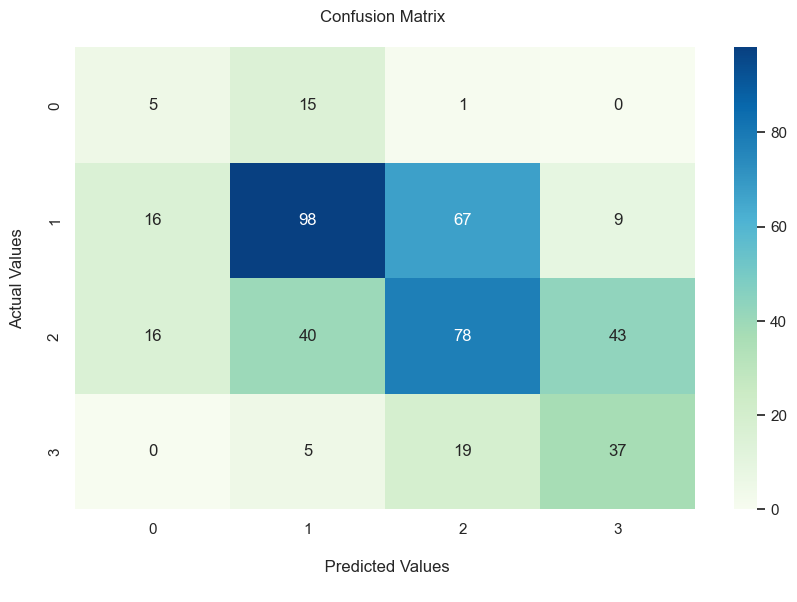

In [64]:
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt=".0f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(['Poor','Medium','Good'])
fx.yaxis.set_ticklabels(['Poor','Medium','Good'])
pass

Feature 0: fixed acidity, Score: 2.70735
Feature 1: volatile acidity, Score: -4.24866
Feature 2: citric acid, Score: 2.29832
Feature 3: residual sugar, Score: -0.89302
Feature 4: chlorides, Score: -0.29448
Feature 5: free sulfur dioxide, Score: 3.22634
Feature 6: total sulfur dioxide, Score: -0.00451
Feature 7: density, Score: -1.17718
Feature 8: pH, Score: -5.10556
Feature 9: sulphates, Score: 1.39277
Feature 10: alcohol, Score: 2.19296


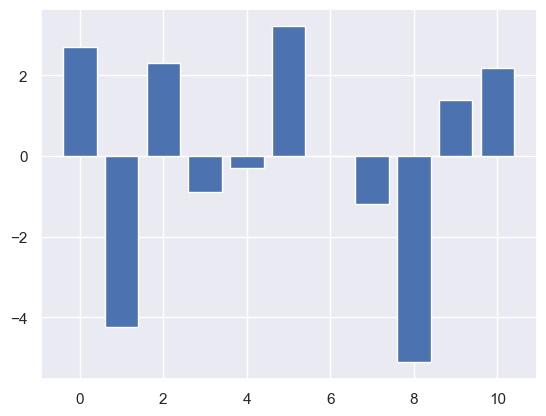

In [ ]:
import matplotlib.pyplot as plt

# feature_labels = []
# for column in train.columns:
#     feature_labels.append(column)
# feature_labels = feature_labels[2:]
feature_labels = numerical_columns
feature_importance = model_log_regr.coef_[2]

for i,v in enumerate(feature_importance):
    print(f"Feature {i}: {feature_labels[i]}, Score: {v:.5f}")

plt.bar([x for x in range(len(feature_importance))], feature_importance)
plt.show()